=== DIMENSIONALITY REDUCTION TECHNIQUES ===

1. LINEAR PRINCIPAL COMPONENT ANALYSIS (PCA)
--------------------------------------------------
Original dataset shape: (569, 30)
Features: 30
Components needed for 95% variance: 10
Reduced dataset shape: (569, 10)
Variance explained: 0.952


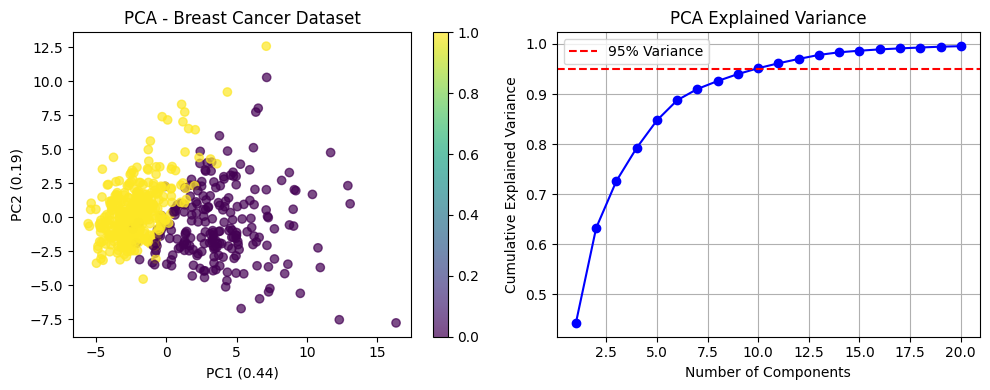



2. KERNEL PCA - NON-LINEAR DIMENSIONALITY REDUCTION
--------------------------------------------------
Non-linear dataset shape: (350, 2)


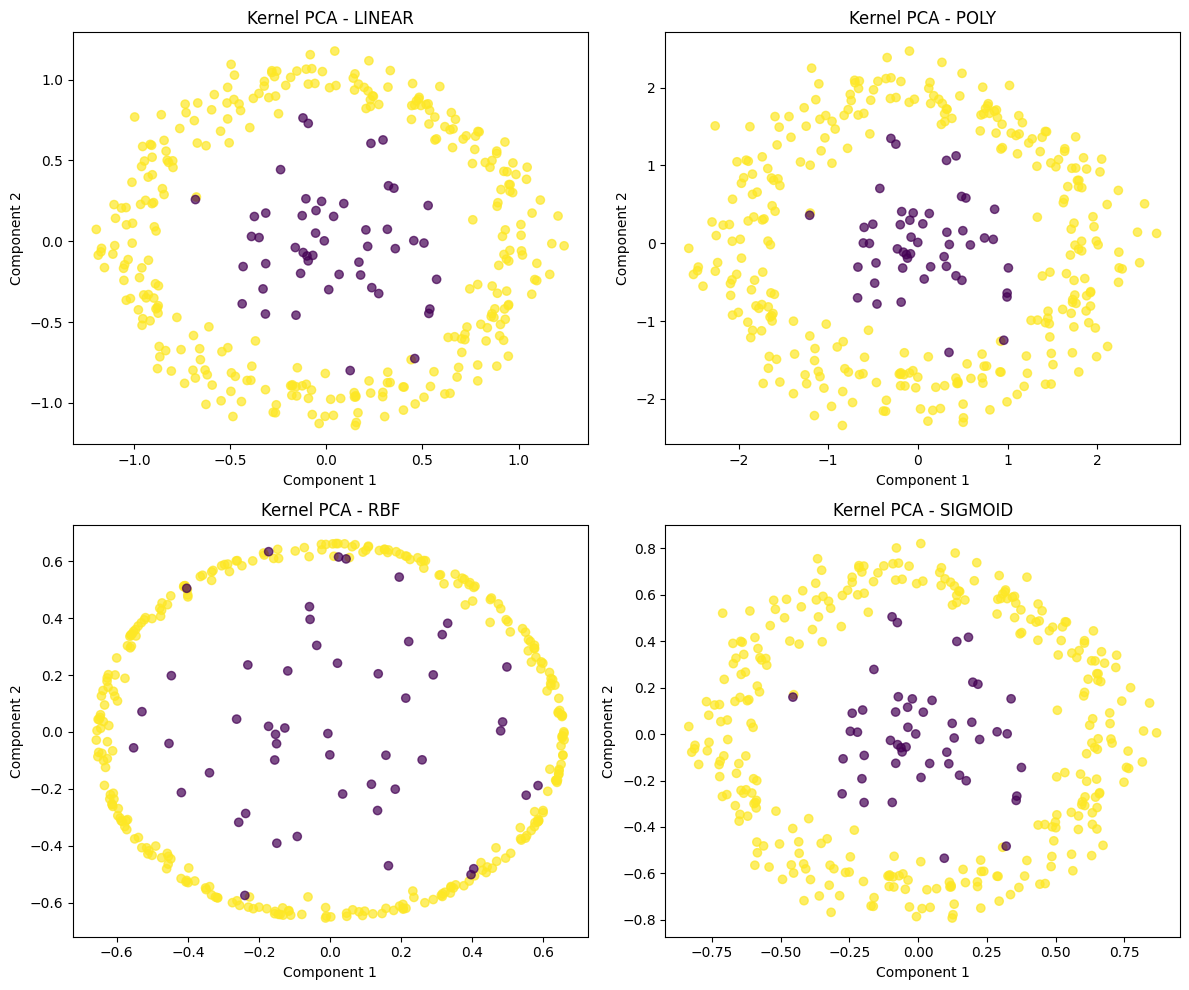

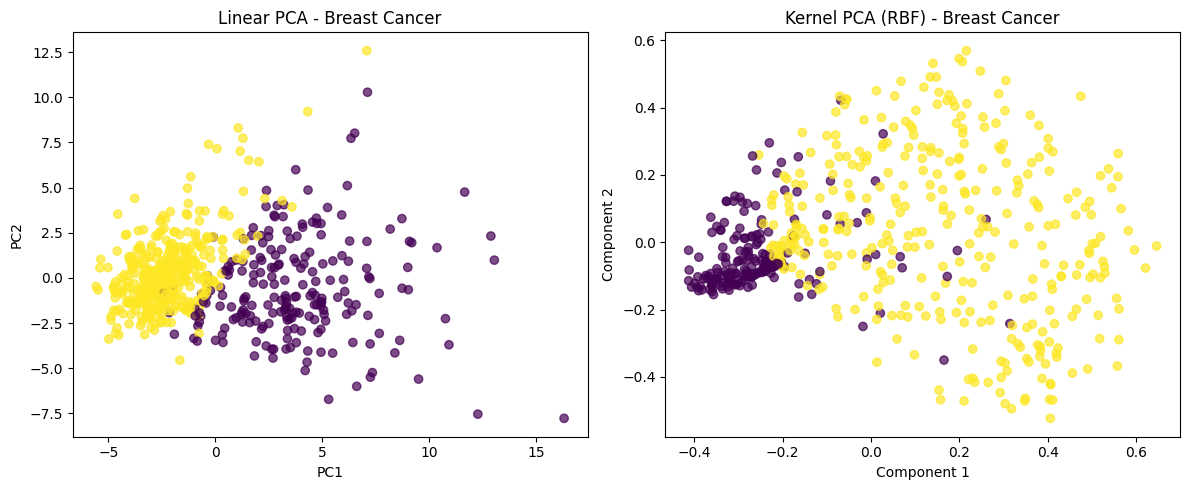



3. LINEAR DISCRIMINANT ANALYSIS (LDA)
--------------------------------------------------
Wine dataset shape: (178, 13)
Number of classes: 3
LDA reduced shape: (178, 2)
Explained variance ratio: [0.68747889 0.31252111]


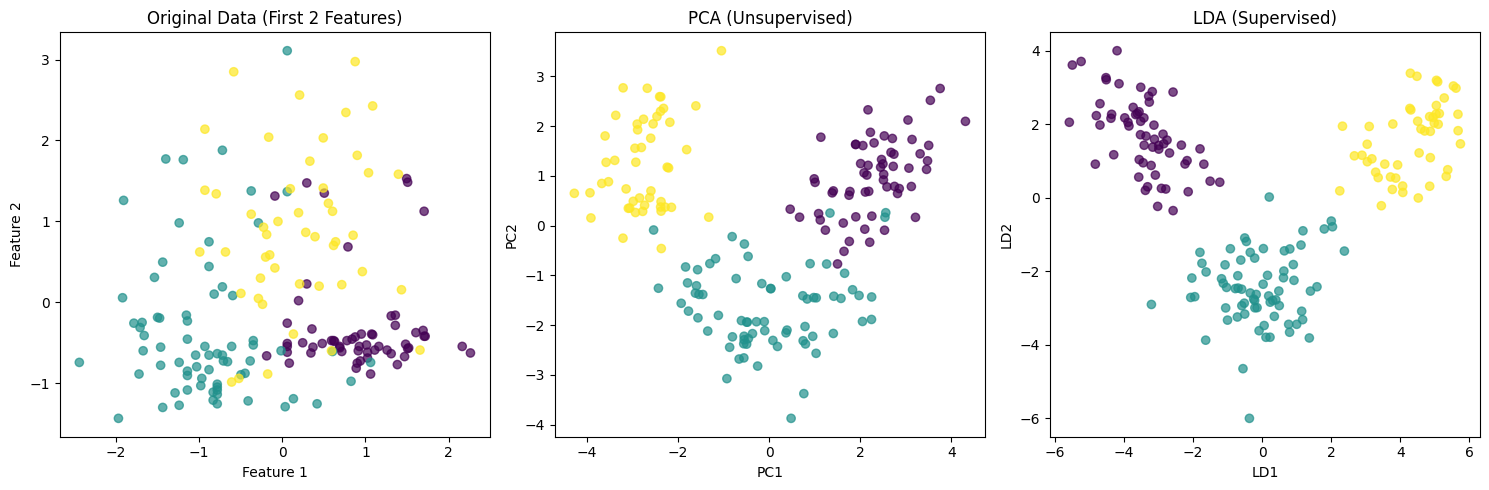



4. CLASSIFICATION PERFORMANCE COMPARISON
--------------------------------------------------
Original        | Features: 13 | Accuracy: 1.000
PCA (2 comp)    | Features:  2 | Accuracy: 0.926
PCA (5 comp)    | Features:  5 | Accuracy: 0.944
LDA             | Features:  2 | Accuracy: 0.963
Kernel PCA      | Features:  5 | Accuracy: 0.963


PROJECT 1: BREAST CANCER WISCONSIN ANALYSIS
PCA Analysis Results:
------------------------------
Components:  2 | Variance: 0.648 | Train Acc: 1.000 | Test Acc: 0.953
Components:  5 | Variance: 0.858 | Train Acc: 1.000 | Test Acc: 0.942
Components: 10 | Variance: 0.956 | Train Acc: 1.000 | Test Acc: 0.953
Components: 15 | Variance: 0.988 | Train Acc: 1.000 | Test Acc: 0.953


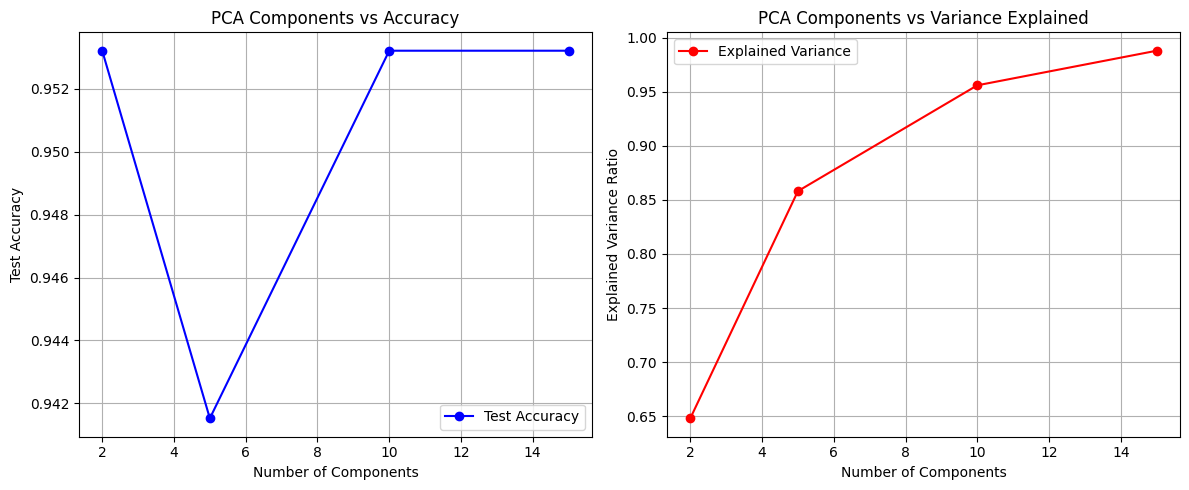



PROJECT 2: WINE CLASSIFICATION COMPARISON
Wine Classification Results:
----------------------------------------
Original (13 features) | Train: 1.000 | Test: 1.000
PCA (2 components)   | Train: 1.000 | Test: 0.926
LDA (2 components)   | Train: 1.000 | Test: 0.963
Kernel PCA (2 comp)  | Train: 1.000 | Test: 0.944


PROJECT 3: DIGITS DATASET ANALYSIS
Digits dataset shape: (1797, 64)
Number of classes: 10
Digits Classification Results:
-----------------------------------
PCA 10 comp | Variance: 0.602 | Accuracy: 0.917
PCA 20 comp | Variance: 0.800 | Accuracy: 0.948
PCA 30 comp | Variance: 0.900 | Accuracy: 0.961
PCA 40 comp | Variance: 0.956 | Accuracy: 0.959


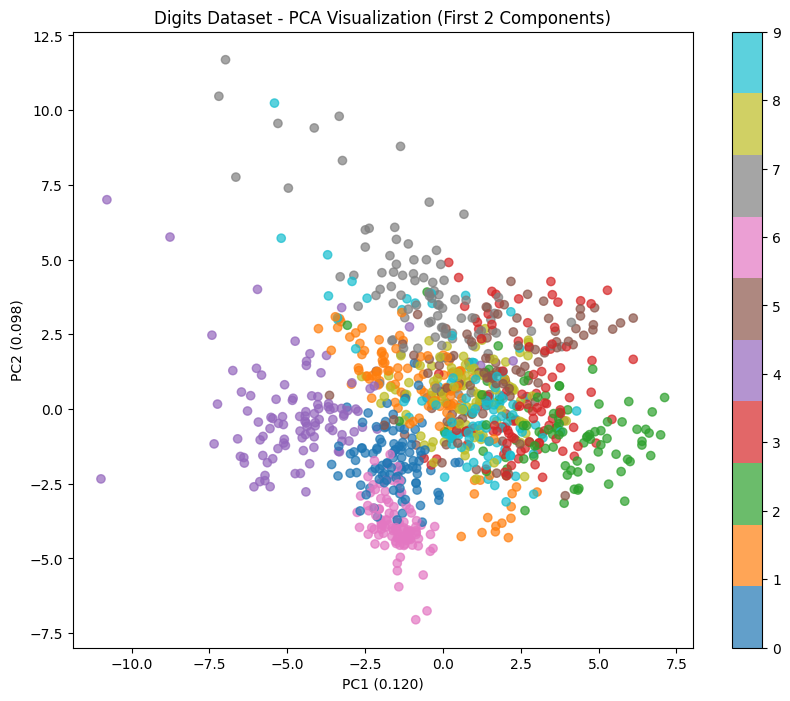



PROJECT 4: TEXT SUMMARIZATION WITH DIMENSIONALITY REDUCTION
Text data shape: (8, 50)
Vocabulary size: 50
Explained variance ratio: [0.20299858 0.17091027 0.15684248]
Total variance explained: 0.531

Top features for each PCA component:
----------------------------------------
Component 1:
  learn: 0.293
  machine: 0.293
  model: -0.279
  performance: -0.279
  learning: 0.265

Component 2:
  helps: 0.303
  multiple: -0.290
  data: 0.211
  dimensionality: 0.207
  high: 0.207

Component 3:
  performance: 0.233
  model: 0.233
  computational: 0.213
  irrelevant: 0.213
  improves: 0.213

Auto-Generated Summary (Top 3 sentences):
---------------------------------------------
1. Feature selection improves model performance by removing irrelevant features. It reduces overfitting and computational cost.
2. Ensemble methods combine multiple models for better predictions. Random forests and gradient boosting are examples.
3. Machine learning is a subset of artificial intelligence. It focuses on

In [1]:
# ===================================================================
# DIMENSIONALITY REDUCTION - COMPLETE CODE EXAMPLES
# Module 8: Unsupervised Learning - Dimensionality Reduction
# ===================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_wine, load_digits
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

print("=== DIMENSIONALITY REDUCTION TECHNIQUES ===\n")

# ===================================================================
# 1. LINEAR PRINCIPAL COMPONENT ANALYSIS (PCA)
# ===================================================================

print("1. LINEAR PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("-" * 50)

# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print(f"Original dataset shape: {X_cancer.shape}")
print(f"Features: {len(cancer.feature_names)}")

# Standardize the data
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

# Apply PCA
pca = PCA()
X_cancer_pca = pca.fit_transform(X_cancer_scaled)

# Calculate cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
print(f"Components needed for 95% variance: {n_components_95}")

# Apply PCA with optimal components
pca_optimal = PCA(n_components=n_components_95)
X_cancer_pca_optimal = pca_optimal.fit_transform(X_cancer_scaled)

print(f"Reduced dataset shape: {X_cancer_pca_optimal.shape}")
print(f"Variance explained: {sum(pca_optimal.explained_variance_ratio_):.3f}")

# Visualize first two components
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_cancer_pca_optimal[:, 0], X_cancer_pca_optimal[:, 1],
           c=y_cancer, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]:.2f})')
plt.title('PCA - Breast Cancer Dataset')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.plot(range(1, min(21, len(cumsum_variance)+1)),
         cumsum_variance[:20], 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n")

# ===================================================================
# 2. KERNEL PCA (NON-LINEAR DIMENSIONALITY REDUCTION)
# ===================================================================

print("2. KERNEL PCA - NON-LINEAR DIMENSIONALITY REDUCTION")
print("-" * 50)

# Create non-linear dataset example
np.random.seed(42)
t = np.linspace(0, 2*np.pi, 300)
X_circle = np.column_stack([
    np.cos(t) + 0.1*np.random.randn(300),
    np.sin(t) + 0.1*np.random.randn(300)
])

# Add some noise points
noise_points = np.random.randn(50, 2) * 0.3
X_nonlinear = np.vstack([X_circle, noise_points])
y_nonlinear = np.hstack([np.ones(300), np.zeros(50)])

print(f"Non-linear dataset shape: {X_nonlinear.shape}")

# Apply different kernel PCA methods
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=1)
    X_kpca = kpca.fit_transform(X_nonlinear)

    axes[i].scatter(X_kpca[:, 0], X_kpca[:, 1],
                   c=y_nonlinear, cmap='viridis', alpha=0.7)
    axes[i].set_title(f'Kernel PCA - {kernel.upper()}')
    axes[i].set_xlabel('Component 1')
    axes[i].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

# Compare Linear PCA vs Kernel PCA on breast cancer data
linear_pca = PCA(n_components=2)
X_linear_pca = linear_pca.fit_transform(X_cancer_scaled)

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kernel_pca = kernel_pca.fit_transform(X_cancer_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_linear_pca[:, 0], X_linear_pca[:, 1],
           c=y_cancer, cmap='viridis', alpha=0.7)
plt.title('Linear PCA - Breast Cancer')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1],
           c=y_cancer, cmap='viridis', alpha=0.7)
plt.title('Kernel PCA (RBF) - Breast Cancer')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()

print("\n")

# ===================================================================
# 3. LINEAR DISCRIMINANT ANALYSIS (LDA) - SUPERVISED DIMENSIONALITY REDUCTION
# ===================================================================

print("3. LINEAR DISCRIMINANT ANALYSIS (LDA)")
print("-" * 50)

# Load wine dataset for multi-class classification
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print(f"Wine dataset shape: {X_wine.shape}")
print(f"Number of classes: {len(np.unique(y_wine))}")

# Standardize the data
X_wine_scaled = StandardScaler().fit_transform(X_wine)

# Apply LDA
lda = LDA()
X_wine_lda = lda.fit_transform(X_wine_scaled, y_wine)

print(f"LDA reduced shape: {X_wine_lda.shape}")
print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

# Compare PCA vs LDA
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

plt.figure(figsize=(15, 5))

# Original data (first 2 features)
plt.subplot(1, 3, 1)
plt.scatter(X_wine_scaled[:, 0], X_wine_scaled[:, 1],
           c=y_wine, cmap='viridis', alpha=0.7)
plt.title('Original Data (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA
plt.subplot(1, 3, 2)
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1],
           c=y_wine, cmap='viridis', alpha=0.7)
plt.title('PCA (Unsupervised)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# LDA
plt.subplot(1, 3, 3)
plt.scatter(X_wine_lda[:, 0], X_wine_lda[:, 1],
           c=y_wine, cmap='viridis', alpha=0.7)
plt.title('LDA (Supervised)')
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.tight_layout()
plt.show()

print("\n")

# ===================================================================
# 4. COMPARISON OF TECHNIQUES ON CLASSIFICATION PERFORMANCE
# ===================================================================

print("4. CLASSIFICATION PERFORMANCE COMPARISON")
print("-" * 50)

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(
    X_wine_scaled, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

# Different dimensionality reduction techniques
techniques = {
    'Original': (X_train, X_test),
    'PCA (2 comp)': (
        PCA(n_components=2).fit_transform(X_train),
        PCA(n_components=2).fit(X_train).transform(X_test)
    ),
    'PCA (5 comp)': (
        PCA(n_components=5).fit_transform(X_train),
        PCA(n_components=5).fit(X_train).transform(X_test)
    ),
    'LDA': (
        LDA().fit_transform(X_train, y_train),
        LDA().fit(X_train, y_train).transform(X_test)
    ),
    'Kernel PCA': (
        KernelPCA(n_components=5, kernel='rbf').fit_transform(X_train),
        KernelPCA(n_components=5, kernel='rbf').fit(X_train).transform(X_test)
    )
}

results = {}

for name, (X_tr, X_te) in techniques.items():
    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_tr, y_train)

    # Predict
    y_pred = clf.predict(X_te)
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'n_features': X_tr.shape[1]
    }

    print(f"{name:15} | Features: {X_tr.shape[1]:2d} | Accuracy: {accuracy:.3f}")

print("\n")

# ===================================================================
# PROJECT 1: BREAST CANCER WISCONSIN ANALYSIS USING PCA
# ===================================================================

print("PROJECT 1: BREAST CANCER WISCONSIN ANALYSIS")
print("=" * 50)

# Load and prepare data
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target
feature_names = cancer_data.feature_names

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with different components
pca_components = [2, 5, 10, 15]
pca_results = {}

print("PCA Analysis Results:")
print("-" * 30)

for n_comp in pca_components:
    # Apply PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_pca, y_train)

    # Evaluate
    train_acc = clf.score(X_train_pca, y_train)
    test_acc = clf.score(X_test_pca, y_test)
    variance_explained = sum(pca.explained_variance_ratio_)

    pca_results[n_comp] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'variance': variance_explained
    }

    print(f"Components: {n_comp:2d} | Variance: {variance_explained:.3f} | "
          f"Train Acc: {train_acc:.3f} | Test Acc: {test_acc:.3f}")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy vs Components
components = list(pca_results.keys())
test_accs = [pca_results[c]['test_acc'] for c in components]
variances = [pca_results[c]['variance'] for c in components]

axes[0].plot(components, test_accs, 'bo-', label='Test Accuracy')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('PCA Components vs Accuracy')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(components, variances, 'ro-', label='Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('PCA Components vs Variance Explained')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n")

# ===================================================================
# PROJECT 2: WINE CLASSIFICATION WITH DIMENSIONALITY REDUCTION
# ===================================================================

print("PROJECT 2: WINE CLASSIFICATION COMPARISON")
print("=" * 50)

# Prepare wine data
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine_scaled, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

# Compare different techniques
wine_techniques = {
    'Original (13 features)': (X_wine_train, X_wine_test),
    'PCA (2 components)': (
        PCA(n_components=2).fit_transform(X_wine_train),
        PCA(n_components=2).fit(X_wine_train).transform(X_wine_test)
    ),
    'LDA (2 components)': (
        LDA(n_components=2).fit_transform(X_wine_train, y_wine_train),
        LDA(n_components=2).fit(X_wine_train, y_wine_train).transform(X_wine_test)
    ),
    'Kernel PCA (2 comp)': (
        KernelPCA(n_components=2, kernel='rbf', gamma=0.1).fit_transform(X_wine_train),
        KernelPCA(n_components=2, kernel='rbf', gamma=0.1).fit(X_wine_train).transform(X_wine_test)
    )
}

print("Wine Classification Results:")
print("-" * 40)

for name, (X_tr, X_te) in wine_techniques.items():
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_tr, y_wine_train)

    train_acc = clf.score(X_tr, y_wine_train)
    test_acc = clf.score(X_te, y_wine_test)

    print(f"{name:20} | Train: {train_acc:.3f} | Test: {test_acc:.3f}")

print("\n")

# ===================================================================
# PROJECT 3: DIGITS DATASET - HIGH DIMENSIONAL DATA
# ===================================================================

print("PROJECT 3: DIGITS DATASET ANALYSIS")
print("=" * 50)

# Load digits dataset
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(f"Digits dataset shape: {X_digits.shape}")
print(f"Number of classes: {len(np.unique(y_digits))}")

# Split data
X_dig_train, X_dig_test, y_dig_train, y_dig_test = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42, stratify=y_digits
)

# Scale data
scaler_digits = StandardScaler()
X_dig_train_scaled = scaler_digits.fit_transform(X_dig_train)
X_dig_test_scaled = scaler_digits.transform(X_dig_test)

# Apply different dimensionality reduction
digits_components = [10, 20, 30, 40]
digits_results = {}

print("Digits Classification Results:")
print("-" * 35)

for n_comp in digits_components:
    # PCA
    pca_dig = PCA(n_components=n_comp)
    X_dig_train_pca = pca_dig.fit_transform(X_dig_train_scaled)
    X_dig_test_pca = pca_dig.transform(X_dig_test_scaled)

    # Train and evaluate
    clf_dig = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_dig.fit(X_dig_train_pca, y_dig_train)

    test_acc = clf_dig.score(X_dig_test_pca, y_dig_test)
    variance_exp = sum(pca_dig.explained_variance_ratio_)

    digits_results[n_comp] = {
        'accuracy': test_acc,
        'variance': variance_exp
    }

    print(f"PCA {n_comp:2d} comp | Variance: {variance_exp:.3f} | Accuracy: {test_acc:.3f}")

# Visualize first few digits in reduced space
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_dig_train_scaled[:1000])  # First 1000 samples

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1],
                     c=y_dig_train[:1000], cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('Digits Dataset - PCA Visualization (First 2 Components)')
plt.xlabel(f'PC1 ({pca_vis.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'PC2 ({pca_vis.explained_variance_ratio_[1]:.3f})')
plt.show()

print("\n")

# ===================================================================
# PROJECT 4: TEXT ANALYSIS - SIMPLE RULE-BASED SUMMARIZATION
# ===================================================================

print("PROJECT 4: TEXT SUMMARIZATION WITH DIMENSIONALITY REDUCTION")
print("=" * 60)

# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence. It focuses on algorithms that learn patterns from data.",
    "Deep learning uses neural networks with multiple layers. It has revolutionized computer vision and natural language processing.",
    "Data science combines statistics, programming, and domain expertise. It helps extract insights from large datasets.",
    "Python is widely used in data science and machine learning. It has excellent libraries like scikit-learn and pandas.",
    "Dimensionality reduction helps visualize high-dimensional data. PCA and t-SNE are popular techniques.",
    "Feature selection improves model performance by removing irrelevant features. It reduces overfitting and computational cost.",
    "Cross-validation helps assess model performance. It provides better estimates than simple train-test splits.",
    "Ensemble methods combine multiple models for better predictions. Random forests and gradient boosting are examples."
]

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=50, stop_words='english')
X_text = vectorizer.fit_transform(documents)

print(f"Text data shape: {X_text.shape}")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

# Apply PCA to text vectors
pca_text = PCA(n_components=3)
X_text_pca = pca_text.fit_transform(X_text.toarray())

print(f"Explained variance ratio: {pca_text.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca_text.explained_variance_ratio_):.3f}")

# Get top features for each component
feature_names = vectorizer.get_feature_names_out()
components = pca_text.components_

print("\nTop features for each PCA component:")
print("-" * 40)

for i, component in enumerate(components):
    top_indices = np.argsort(np.abs(component))[-5:][::-1]
    top_features = [feature_names[idx] for idx in top_indices]
    top_weights = component[top_indices]

    print(f"Component {i+1}:")
    for feature, weight in zip(top_features, top_weights):
        print(f"  {feature}: {weight:.3f}")
    print()

# Simple rule-based summarization using PCA components
def simple_summarize(documents, n_sentences=3):
    # Calculate sentence importance based on PCA component similarity
    sentence_scores = []

    for i, doc in enumerate(documents):
        # Simple scoring based on PCA component weights
        score = np.sum(np.abs(X_text_pca[i]))
        sentence_scores.append((score, i, doc))

    # Sort by score and return top sentences
    sentence_scores.sort(reverse=True)
    summary_sentences = [doc for _, _, doc in sentence_scores[:n_sentences]]

    return summary_sentences

summary = simple_summarize(documents, n_sentences=3)

print("Auto-Generated Summary (Top 3 sentences):")
print("-" * 45)
for i, sentence in enumerate(summary, 1):
    print(f"{i}. {sentence}")

print("\n")

# ===================================================================
# PERFORMANCE SUMMARY AND RECOMMENDATIONS
# ===================================================================

print("DIMENSIONALITY REDUCTION SUMMARY")
print("=" * 50)

recommendations = {
    "PCA": "Best for linear relationships, preserves maximum variance",
    "Kernel PCA": "Use for non-linear data, more computationally expensive",
    "LDA": "Best for classification tasks, maximizes class separability",
    "Feature Selection": "Maintains interpretability, removes irrelevant features"
}

print("When to use each technique:")
print("-" * 30)
for technique, recommendation in recommendations.items():
    print(f"{technique:15}: {recommendation}")

print("\nKey Takeaways:")
print("- Always standardize data before applying dimensionality reduction")
print("- PCA preserves variance but may not be optimal for classification")
print("- LDA is supervised and often better for classification tasks")
print("- Kernel PCA can capture non-linear relationships")
print("- Balance between dimensionality reduction and information loss")
print("- Visualize results to understand the transformation")

print("\n=== END OF DIMENSIONALITY REDUCTION EXAMPLES ===")